In [230]:
import requests,json;import pandas as pd
#making a call to nhtsa gov api to check vehicle details based on the vin numbers
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from Levenshtein import distance
import re 

In [231]:
endpointurl = 'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVINValuesBatch/'; #API end point
#getting data back in csv format by providing auto VIN numbers (a limit of 5-7 vins are allowed at a time before it times out erroring)
post_parameter_fields = {'format': 'csv', 'data':'KL4CJASB6HB002683;1G1ZE5ST1HF176666;JM3KE4DY2F0462173;YV4A22NLXH1006162;19UDE2F32GA001284;19VDE1F52DE012636;WAUBFAFL4EA074471;WBAVM1C57EVW50300;KL4CJASB9EB550348'};
r = requests.post(endpointurl, data= post_parameter_fields) #making the request with post to get constructor
print(r.text) #reading the content of the contructor

vin,batteryinfo,batterytype,bedtype,bodycabtype,bodyclass,enginecylinders,destinationmarket,displacementcc,displacementci,displacementl,doors,drivetype,driverassist,enginecycles,enginemodel,enginekw,entertainmentsystem,fueltypeprimary,gvwr,make,manufacturer,model,modelyear,plantcity,seats,series,steeringlocation,transmissionstyle,trim,vehicletype,windows,axles,brakesystemtype,batterycells,bedlengthin,brakesystemdesc,curbweightlb,airbagloccurtain,airbaglocseatcushion,batterya,batteryv,batterykwh,wheelbasetype,seatrows,valvetraindesign,transmissionspeeds,engineconfiguration,airbaglocfront,fueltypesecondary,fuelinjectiontype,airbaglocknee,enginehp,evdriveunit,plantcountry,plantcompanyname,plantstate,pretensioner,seatbeltsall,adaptivecruisecontrol,adaptiveheadlights,abs,cib,blindspotmon,ncsabodytype,ncsamake,ncsamodel,esc,tractioncontrol,forwardcollisionwarning,lanedeparturewarning,lanekeepsystem,rearvisibilitysystem,parkassist,airbaglocside,trim2,series2,wheelbaseshort,wheelbaselong,note,

In [232]:
location=r"C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 540 Data Preparation\csvfile.csv" #location of csv file to be written
with open(location,'w') as file: #writing csv file in 'w' mode
    for line in r.text: #reading one line at a time
        if line != '\n': #if not a new line 
            file.write(line) #write the line
        ##file.write('\n')
file.close() #close the csv file

In [233]:
df=pd.read_csv(location)

In [234]:
df

,vin,batteryinfo,batterytype,bedtype,bodycabtype,bodyclass,enginecylinders,destinationmarket,displacementcc,displacementci,displacementl,doors,drivetype,driverassist,enginecycles,enginemodel,enginekw,entertainmentsystem,fueltypeprimary,gvwr,make,manufacturer,model,modelyear,plantcity,seats,series,steeringlocation,transmissionstyle,trim,vehicletype,windows,axles,brakesystemtype,batterycells,bedlengthin,brakesystemdesc,curbweightlb,airbagloccurtain,airbaglocseatcushion,batterya,batteryv,batterykwh,wheelbasetype,seatrows,valvetraindesign,transmissionspeeds,engineconfiguration,airbaglocfront,fueltypesecondary,fuelinjectiontype,airbaglocknee,enginehp,evdriveunit,plantcountry,plantcompanyname,plantstate,pretensioner,seatbeltsall,adaptivecruisecontrol,adaptiveheadlights,abs,cib,blindspotmon,ncsabodytype,ncsamake,ncsamodel,esc,tractioncontrol,forwardcollisionwarning,lanedeparturewarning,lanekeepsystem,rearvisibilitysystem,parkassist,airbaglocside,trim2,series2,wheelbaseshort,wheelbaselong,note,wheels,trailertype,trailerbodytype,trailerlength,wheelsizefront,wheelsizerear,otherrestraintsysteminfo,coolingtype,enginehp_to,electrificationlevel,chargerlevel,chargerpowerkw,otherengineinfo,batterya_to,batteryv_to,batterykwh_to,turbo,baseprice,batterymodules,batterypacks,topspeedmph,suggestedvin,errorcode,possiblevalues,axleconfiguration,enginemanufacturer,buslength,busfloorconfigtype,bustype,otherbusinfo,custommotorcycletype,motorcyclesuspensiontype,motorcyclechassistype,othermotorcycleinfo,othertrailerinfo,additionalerrortext,manufacturerid,cashforclunkers,trackwidth,tpms,activesafetysysnote,dynamicbrakesupport,pedestrianautomaticemergencybraking,autoreversesystem,automaticpedestrianalertingsound,can_aacn,edr,keylessignition,daytimerunninglight,lowerbeamheadlamplightsource,semiautomaticheadlampbeamswitching,adaptivedrivingbeam,saeautomationlevel,saeautomationlevel_to,rearcrosstrafficalert,gcwr,gcwr_to,ncsanote,ncsamappingexception,ncsamapexcapprovedon,ncsamapexcapprovedby,gvwr_to,errortext
0,KL4CJASB6HB002683,NaN,NaN,NaN,NaN,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,NaN,1400.000000,85.433242,1.400000,4,FWD/Front Wheel Drive,NaN,NaN,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",NaN,NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,NaN,NaN,NaN,NaN,All Rows,NaN,NaN,NaN,NaN,NaN,2.0,Dual Overhead Cam (DOHC),6.0,NaN,1st Row (Driver & Passenger),NaN,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),NaN,NaN,SOUTH KOREA,GM Korea,NaN,NaN,Manual,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,Standard,Standard,NaN,NaN,NaN,Standard,NaN,1st & 2nd Rows,NaN,NaN,100.6,NaN,NaN,4.0,Not Applicable,Not Applicable,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,24365.0,NaN,NaN,120.0,NaN,0,NaN,NaN,GME,NaN,Not Applicable,Not Applicable,NaN,Not Applicable,Not Applicable,Not Applicable,NaN,NaN,NaN,984,NaN,NaN,Direct,NaN,Standard,NaN,Standard,NaN,Standard,NaN,Standard,Standard,NaN,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 - VIN decoded clean. Check Digit (9th positi...
1,1G1ZE5ST1HF176666,NaN,NaN,Not Applicable,Not Applicable,Sedan/Saloon,4,NaN,1500.000000,91.535616,1.500000,4,NaN,NaN,NaN,"LFV - DI: Direct Injection, VVT: Variable Valv...",NaN,NaN,Gasoline,NaN,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),NaN,NaN,PASSENGER CAR,4.0,2.0,NaN,NaN,NaN,NaN,NaN,All Rows,NaN,NaN,NaN,NaN,NaN,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,1st Row (Driver & Passenger),NaN,NaN,UNITED STATES (USA),GMNA,KANSAS,NaN,Manual,NaN,NaN,Standard,Optional,Optional,NaN,NaN,NaN,Standard,Standard,Optional,Optional,Optional,Standard,NaN,1st & 2nd Rows,NaN,NaN,111.4,NaN,NaN,4.0,Not Applicable,Not Applicable,NaN,17.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,25125.0,NaN,NaN,130.0,NaN,0,NaN,NaN,GMNA,NaN,Not Applicable,Not A

In [235]:
df.columns = [x.upper() for x in df.columns] #change the column headers to upper case

In [236]:
df.describe()

,BATTERYINFO,BATTERYTYPE,ENGINECYLINDERS,DESTINATIONMARKET,DISPLACEMENTCC,DISPLACEMENTCI,DISPLACEMENTL,DOORS,DRIVERASSIST,ENGINECYCLES,ENGINEKW,ENTERTAINMENTSYSTEM,MODELYEAR,SEATS,WINDOWS,AXLES,BATTERYCELLS,BEDLENGTHIN,BRAKESYSTEMDESC,CURBWEIGHTLB,AIRBAGLOCSEATCUSHION,BATTERYA,BATTERYV,BATTERYKWH,WHEELBASETYPE,SEATROWS,TRANSMISSIONSPEEDS,ENGINEHP,EVDRIVEUNIT,ADAPTIVECRUISECONTROL,ADAPTIVEHEADLIGHTS,NCSABODYTYPE,NCSAMAKE,NCSAMODEL,PARKASSIST,TRIM2,SERIES2,WHEELBASESHORT,WHEELBASELONG,WHEELS,TRAILERLENGTH,WHEELSIZEFRONT,WHEELSIZEREAR,ENGINEHP_TO,ELECTRIFICATIONLEVEL,CHARGERLEVEL,CHARGERPOWERKW,BATTERYA_TO,BATTERYV_TO,BATTERYKWH_TO,BASEPRICE,BATTERYMODULES,BATTERYPACKS,TOPSPEEDMPH,SUGGESTEDVIN,ERRORCODE,POSSIBLEVALUES,AXLECONFIGURATION,BUSLENGTH,OTHERBUSINFO,OTHERMOTORCYCLEINFO,OTHERTRAILERINFO,ADDITIONALERRORTEXT,MANUFACTURERID,CASHFORCLUNKERS,TRACKWIDTH,ACTIVESAFETYSYSNOTE,AUTOMATICPEDESTRIANALERTINGSOUND,EDR,LOWERBEAMHEADLAMPLIGHTSOURCE,SAEAUTOMATIONLEVEL,SAEAUTOMATIONLEVEL_TO,REARCROSSTRAFFICALERT,GCWR,GCWR_TO,NCSANOTE,NCSAMAPPINGEXCEPTION,NCSAMAPEXCAPPROVEDON,NCSAMAPEXCAPPROVEDBY,GVWR_TO
count,0.0,0.0,9.0,0.0,9.000000,9.000000,9.000000,9.0,0.0,0.0,5.000000,0.0,9.000000,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,2.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,2.000000,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,4.0,NaN,1904.526357,116.197784,1.904591,4.0,NaN,NaN,168.229920,NaN,2015.222222,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.333333,225.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.000000,NaN,4.0,NaN,17.500000,17.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24745.000000,NaN,NaN,125.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,398.063895,24.285110,0.398081,0.0,NaN,NaN,45.299664,NaN,1.563472,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.527525,60.747839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.636753,NaN,0.0,NaN,0.707107,0.707107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.401154,NaN,NaN,7.071068,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.937713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.0,NaN,1400.000000,85.433242,1.400000,4.0,NaN,NaN,111.855000,NaN,2013.000000,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.600000,NaN,4.0,NaN,17.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24365.000000,NaN,NaN,120.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.0,NaN,1500.000000,91.535616,1.500000,4.0,NaN,NaN,149.885700,NaN,2014.000000,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.500000,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.300000,NaN,4.0,NaN,17.250000,17.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24555.000000,NaN,NaN,122.500000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.0,NaN,1997.000000,121.800000,1.997583,4.0,NaN,NaN,164.054000,NaN,2015.000000,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.000000,220.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.000000,NaN,4.0,NaN,17.500000,17.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24745.000000,NaN,NaN,125.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.0,NaN,2000.000000,122.047488,2.000000,4.0,NaN,NaN,179.713700,NaN,2017.000000,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7.000000,241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.700000,NaN,4.0,NaN,17.750000,17.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24935.000000,NaN,NaN,127.500000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,4.0,NaN,2500.000000,152.559

In [237]:
df.isnull().values.any() #Finding null values in datafram

True

In [238]:
df['BATTERYINFO'].isnull().values.any() #Finding of batteryinfo column is all nulls

True

In [239]:
dfbool=df.isnull().values.all(axis=0) #Checking  column of the df has all nulls 

In [240]:
dfbool

array([False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True, False,
        True, False,

In [241]:
df=df.dropna(axis='columns',how='all' ) #drop columns with all values as null

In [242]:
df

,VIN,BEDTYPE,BODYCABTYPE,BODYCLASS,ENGINECYLINDERS,DISPLACEMENTCC,DISPLACEMENTCI,DISPLACEMENTL,DOORS,DRIVETYPE,ENGINEMODEL,ENGINEKW,FUELTYPEPRIMARY,GVWR,MAKE,MANUFACTURER,MODEL,MODELYEAR,PLANTCITY,SEATS,SERIES,STEERINGLOCATION,TRANSMISSIONSTYLE,TRIM,VEHICLETYPE,WINDOWS,AXLES,BRAKESYSTEMTYPE,AIRBAGLOCCURTAIN,SEATROWS,VALVETRAINDESIGN,TRANSMISSIONSPEEDS,ENGINECONFIGURATION,AIRBAGLOCFRONT,FUELTYPESECONDARY,FUELINJECTIONTYPE,AIRBAGLOCKNEE,ENGINEHP,PLANTCOUNTRY,PLANTCOMPANYNAME,PLANTSTATE,PRETENSIONER,SEATBELTSALL,ABS,CIB,BLINDSPOTMON,ESC,TRACTIONCONTROL,FORWARDCOLLISIONWARNING,LANEDEPARTUREWARNING,LANEKEEPSYSTEM,REARVISIBILITYSYSTEM,AIRBAGLOCSIDE,WHEELBASESHORT,NOTE,WHEELS,TRAILERTYPE,TRAILERBODYTYPE,WHEELSIZEFRONT,WHEELSIZEREAR,OTHERRESTRAINTSYSTEMINFO,COOLINGTYPE,OTHERENGINEINFO,TURBO,BASEPRICE,TOPSPEEDMPH,ERRORCODE,ENGINEMANUFACTURER,BUSFLOORCONFIGTYPE,BUSTYPE,CUSTOMMOTORCYCLETYPE,MOTORCYCLESUSPENSIONTYPE,MOTORCYCLECHASSISTYPE,MANUFACTURERID,TPMS,DYNAMICBRAKESUPPORT,PEDESTRIANAUTOMATICEMERGENCYBRAKING,AUTOREVERSESYSTEM,CAN_AACN,KEYLESSIGNITION,DAYTIMERUNNINGLIGHT,SEMIAUTOMATICHEADLAMPBEAMSWITCHING,ADAPTIVEDRIVINGBEAM,ERRORTEXT
0,KL4CJASB6HB002683,NaN,NaN,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,1400.000000,85.433242,1.400000,4,FWD/Front Wheel Drive,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,All Rows,2.0,Dual Overhead Cam (DOHC),6.0,NaN,1st Row (Driver & Passenger),NaN,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),NaN,SOUTH KOREA,GM Korea,NaN,NaN,Manual,Standard,NaN,NaN,Standard,Standard,NaN,NaN,NaN,Standard,1st & 2nd Rows,100.6,NaN,4.0,Not Applicable,Not Applicable,18.0,18.0,NaN,NaN,NaN,Yes,24365.0,120.0,0,GME,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,NaN,Standard,Standard,Standard,Standard,Standard,NaN,0 - VIN decoded clean. Check Digit (9th positi...
1,1G1ZE5ST1HF176666,Not Applicable,Not Applicable,Sedan/Saloon,4,1500.000000,91.535616,1.500000,4,NaN,"LFV - DI: Direct Injection, VVT: Variable Valv...",NaN,Gasoline,NaN,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),NaN,NaN,PASSENGER CAR,4.0,2.0,NaN,All Rows,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,1st Row (Driver & Passenger),NaN,UNITED STATES (USA),GMNA,KANSAS,NaN,Manual,Standard,Optional,Optional,Standard,Standard,Optional,Optional,Optional,Standard,1st & 2nd Rows,111.4,NaN,4.0,Not Applicable,Not Applicable,17.0,17.0,NaN,NaN,NaN,Yes,25125.0,130.0,0,GMNA,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,Optional,Standard,Standard,Standard,Standard,Standard,Optional,0 - VIN decoded clean. Check Digit (9th positi...
2,JM3KE4DY2F0462173,NaN,NaN,Wagon,4,2500.000000,152.559360,2.500000,4,4WD/4-Wheel Drive/4x4,PY,NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",MAZDA,MAZDA MOTOR CORPORATION,CX-5,2015,HIROSHIMA,NaN,NaN,NaN,NaN,Grand Touring/GT,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,NaN,NaN,JAPAN,Mazda Motor Corporation,NaN,NaN,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver & Passenger),NaN,NaN,NaN,Not Applicable,Not Applicable,NaN,NaN,NaN,Water,NaN,NaN,NaN,NaN,0,Mazda,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1041,Indirect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 - VIN decoded clean. Check Digit (9th positi...
3,YV4A22NLXH1006162,NaN,NaN,Wagon,4,2000.000000,122.047488,2.000000,4,AWD/All Wheel Drive,B4204TS,235.6412,Gasoline,"Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)",VOLVO,"VOLVO CAR USA, LLC",V90CC,2017,TORSLANDA,NaN,NaN,NaN,NaN,Inscription,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,NaN,NaN,

In [243]:
df.describe()

,ENGINECYLINDERS,DISPLACEMENTCC,DISPLACEMENTCI,DISPLACEMENTL,DOORS,ENGINEKW,MODELYEAR,SEATS,WINDOWS,AXLES,SEATROWS,TRANSMISSIONSPEEDS,ENGINEHP,WHEELBASESHORT,WHEELS,WHEELSIZEFRONT,WHEELSIZEREAR,BASEPRICE,TOPSPEEDMPH,ERRORCODE,MANUFACTURERID
count,9.0,9.000000,9.000000,9.000000,9.0,5.000000,9.000000,2.0,1.0,2.0,2.0,3.000000,5.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,9.0,9.000000
mean,4.0,1904.526357,116.197784,1.904591,4.0,168.229920,2015.222222,5.0,4.0,2.0,2.0,6.333333,225.600000,106.000000,4.0,17.500000,17.500000,24745.000000,125.000000,0.0,1010.555556
std,0.0,398.063895,24.285110,0.398081,0.0,45.299664,1.563472,0.0,NaN,0.0,0.0,1.527525,60.747839,7.636753,0.0,0.707107,0.707107,537.401154,7.071068,0.0,55.937713
min,4.0,1400.000000,85.433242,1.400000,4.0,111.855000,2013.000000,5.0,4.0,2.0,2.0,5.000000,150.000000,100.600000,4.0,17.000000,17.000000,24365.000000,120.000000,0.0,966.000000
25%,4.0,1500.000000,91.535616,1.500000,4.0,149.885700,2014.000000,5.0,4.0,2.0,2.0,5.500000,201.000000,103.300000,4.0,17.250000,17.250000,24555.000000,122.500000,0.0,984.000000
50%,4.0,1997.000000,121.800000,1.997583,4.0,164.054000,2015.000000,5.0,4.0,2.0,2.0,6.000000,220.000000,106.000000,4.0,17.500000,17.500000,24745.000000,125.000000,0.0,988.000000
75%,4.0,2000.000000,122.047488,2.000000,4.0,179.713700,2017.000000,5.0,4.0,2.0,2.0,7.000000,241.000000,108.700000,4.0,17.750000,17.750000,24935.000000,127.500000,0.0,1006.000000
max,4.0,2500.000000,152.559360,2.500000,4.0,235.641200,2017.000000,5.0,4.0,2.0,2.0,8.000000,316.000000,111.400000,4.0,18.000000,18.000000,25125.000000,130.000000,0.0,1149.000000


In [244]:
df.isnull().sum() #checking to see if modified df has any null values

VIN                                   0
BEDTYPE                               4
BODYCABTYPE                           4
BODYCLASS                             0
ENGINECYLINDERS                       0
                                     ..
KEYLESSIGNITION                       7
DAYTIMERUNNINGLIGHT                   7
SEMIAUTOMATICHEADLAMPBEAMSWITCHING    7
ADAPTIVEDRIVINGBEAM                   8
ERRORTEXT                             0
Length: 84, dtype: int64

In [245]:
df.isnull().sum().sum() #total null values in datafram

332

In [246]:
dfvincheck=(df['VIN'].apply(len) !=17) #checking if VIN number is more than the standard 17 charector length

In [247]:
dfvincheck.count() #confirms all values in dataset conforms to 17 digit vin number format

9

In [248]:
(g for _, g in df.groupby('VIN') if len(g) > 1 )
#none exist to find duplicates

<generator object <genexpr> at 0x0EE55480>

In [249]:
df.drop_duplicates(keep=False,inplace=True)  #remove duplicates in the entire dataframe

C:\Users\rdanda\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
pd.set_option('display.max_columns', None) #show all columns of the data frame

In [251]:
df=df.round(2) #ronding up the values to nearest 2 digits

In [252]:
df.head()

,VIN,BEDTYPE,BODYCABTYPE,BODYCLASS,ENGINECYLINDERS,DISPLACEMENTCC,DISPLACEMENTCI,DISPLACEMENTL,DOORS,DRIVETYPE,ENGINEMODEL,ENGINEKW,FUELTYPEPRIMARY,GVWR,MAKE,MANUFACTURER,MODEL,MODELYEAR,PLANTCITY,SEATS,SERIES,STEERINGLOCATION,TRANSMISSIONSTYLE,TRIM,VEHICLETYPE,WINDOWS,AXLES,BRAKESYSTEMTYPE,AIRBAGLOCCURTAIN,SEATROWS,VALVETRAINDESIGN,TRANSMISSIONSPEEDS,ENGINECONFIGURATION,AIRBAGLOCFRONT,FUELTYPESECONDARY,FUELINJECTIONTYPE,AIRBAGLOCKNEE,ENGINEHP,PLANTCOUNTRY,PLANTCOMPANYNAME,PLANTSTATE,PRETENSIONER,SEATBELTSALL,ABS,CIB,BLINDSPOTMON,ESC,TRACTIONCONTROL,FORWARDCOLLISIONWARNING,LANEDEPARTUREWARNING,LANEKEEPSYSTEM,REARVISIBILITYSYSTEM,AIRBAGLOCSIDE,WHEELBASESHORT,NOTE,WHEELS,TRAILERTYPE,TRAILERBODYTYPE,WHEELSIZEFRONT,WHEELSIZEREAR,OTHERRESTRAINTSYSTEMINFO,COOLINGTYPE,OTHERENGINEINFO,TURBO,BASEPRICE,TOPSPEEDMPH,ERRORCODE,ENGINEMANUFACTURER,BUSFLOORCONFIGTYPE,BUSTYPE,CUSTOMMOTORCYCLETYPE,MOTORCYCLESUSPENSIONTYPE,MOTORCYCLECHASSISTYPE,MANUFACTURERID,TPMS,DYNAMICBRAKESUPPORT,PEDESTRIANAUTOMATICEMERGENCYBRAKING,AUTOREVERSESYSTEM,CAN_AACN,KEYLESSIGNITION,DAYTIMERUNNINGLIGHT,SEMIAUTOMATICHEADLAMPBEAMSWITCHING,ADAPTIVEDRIVINGBEAM,ERRORTEXT
0,KL4CJASB6HB002683,NaN,NaN,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,1400.00,85.43,1.40,4,FWD/Front Wheel Drive,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,All Rows,2.0,Dual Overhead Cam (DOHC),6.0,NaN,1st Row (Driver & Passenger),NaN,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),NaN,SOUTH KOREA,GM Korea,NaN,NaN,Manual,Standard,NaN,NaN,Standard,Standard,NaN,NaN,NaN,Standard,1st & 2nd Rows,100.6,NaN,4.0,Not Applicable,Not Applicable,18.0,18.0,NaN,NaN,NaN,Yes,24365.0,120.0,0,GME,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,NaN,Standard,Standard,Standard,Standard,Standard,NaN,0 - VIN decoded clean. Check Digit (9th positi...
1,1G1ZE5ST1HF176666,Not Applicable,Not Applicable,Sedan/Saloon,4,1500.00,91.54,1.50,4,NaN,"LFV - DI: Direct Injection, VVT: Variable Valv...",NaN,Gasoline,NaN,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),NaN,NaN,PASSENGER CAR,4.0,2.0,NaN,All Rows,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,1st Row (Driver & Passenger),NaN,UNITED STATES (USA),GMNA,KANSAS,NaN,Manual,Standard,Optional,Optional,Standard,Standard,Optional,Optional,Optional,Standard,1st & 2nd Rows,111.4,NaN,4.0,Not Applicable,Not Applicable,17.0,17.0,NaN,NaN,NaN,Yes,25125.0,130.0,0,GMNA,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,Optional,Standard,Standard,Standard,Standard,Standard,Optional,0 - VIN decoded clean. Check Digit (9th positi...
2,JM3KE4DY2F0462173,NaN,NaN,Wagon,4,2500.00,152.56,2.50,4,4WD/4-Wheel Drive/4x4,PY,NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",MAZDA,MAZDA MOTOR CORPORATION,CX-5,2015,HIROSHIMA,NaN,NaN,NaN,NaN,Grand Touring/GT,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,NaN,NaN,JAPAN,Mazda Motor Corporation,NaN,NaN,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver & Passenger),NaN,NaN,NaN,Not Applicable,Not Applicable,NaN,NaN,NaN,Water,NaN,NaN,NaN,NaN,0,Mazda,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1041,Indirect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 - VIN decoded clean. Check Digit (9th positi...
3,YV4A22NLXH1006162,NaN,NaN,Wagon,4,2000.00,122.05,2.00,4,AWD/All Wheel Drive,B4204TS,235.64,Gasoline,"Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)",VOLVO,"VOLVO CAR USA, LLC",V90CC,2017,TORSLANDA,NaN,NaN,NaN,NaN,Inscription,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,NaN,NaN,NaN,1st Row (Driver & Passenger),NaN,NaN,Driver Se

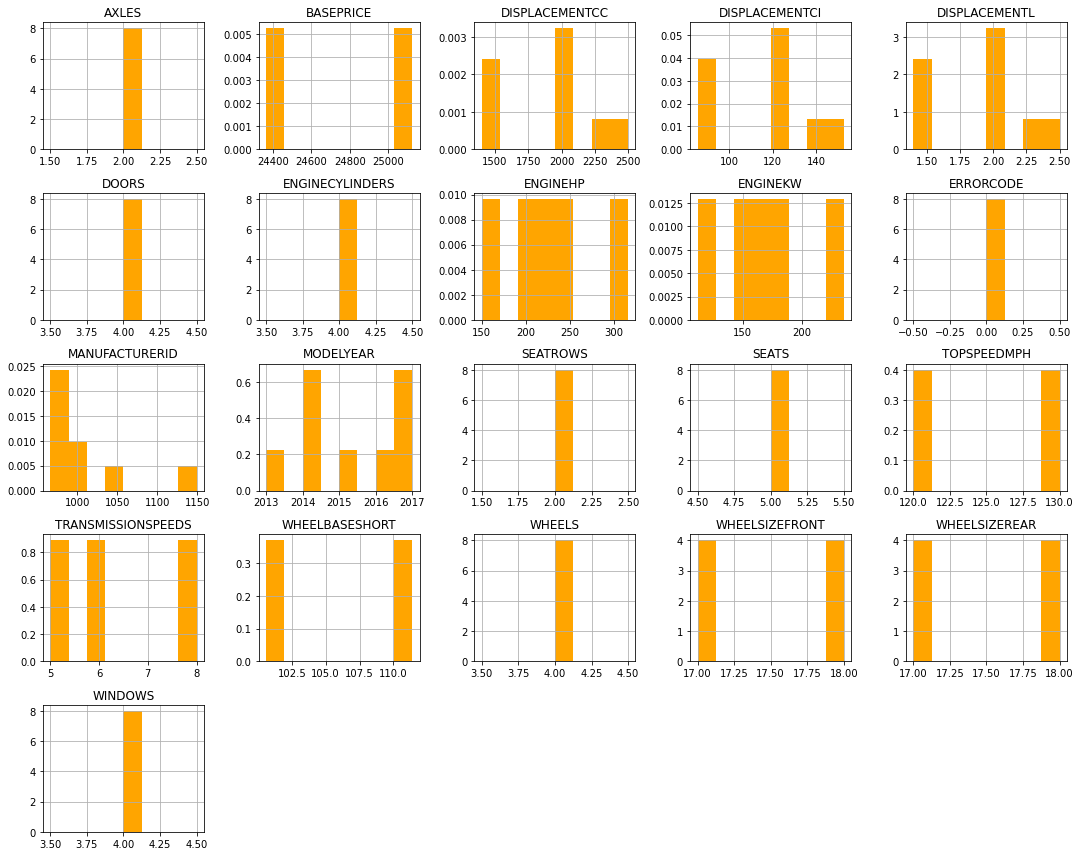

In [253]:
df.hist(bins=8,figsize=(15,12), color='orange',density=True) #Histogram of values available
plt.tight_layout()

In [254]:
#from the above we can see displacemnt in CC, years and liter displacments are the only values usefull with histograms

In [255]:
c_year = int(dt.datetime.now().year) #get current year

In [256]:
df['AGE_Calcuated']=c_year - df['MODELYEAR'] #create new column AGE substracting year made to current year

In [257]:
df.head()

,VIN,BEDTYPE,BODYCABTYPE,BODYCLASS,ENGINECYLINDERS,DISPLACEMENTCC,DISPLACEMENTCI,DISPLACEMENTL,DOORS,DRIVETYPE,ENGINEMODEL,ENGINEKW,FUELTYPEPRIMARY,GVWR,MAKE,MANUFACTURER,MODEL,MODELYEAR,PLANTCITY,SEATS,SERIES,STEERINGLOCATION,TRANSMISSIONSTYLE,TRIM,VEHICLETYPE,WINDOWS,AXLES,BRAKESYSTEMTYPE,AIRBAGLOCCURTAIN,SEATROWS,VALVETRAINDESIGN,TRANSMISSIONSPEEDS,ENGINECONFIGURATION,AIRBAGLOCFRONT,FUELTYPESECONDARY,FUELINJECTIONTYPE,AIRBAGLOCKNEE,ENGINEHP,PLANTCOUNTRY,PLANTCOMPANYNAME,PLANTSTATE,PRETENSIONER,SEATBELTSALL,ABS,CIB,BLINDSPOTMON,ESC,TRACTIONCONTROL,FORWARDCOLLISIONWARNING,LANEDEPARTUREWARNING,LANEKEEPSYSTEM,REARVISIBILITYSYSTEM,AIRBAGLOCSIDE,WHEELBASESHORT,NOTE,WHEELS,TRAILERTYPE,TRAILERBODYTYPE,WHEELSIZEFRONT,WHEELSIZEREAR,OTHERRESTRAINTSYSTEMINFO,COOLINGTYPE,OTHERENGINEINFO,TURBO,BASEPRICE,TOPSPEEDMPH,ERRORCODE,ENGINEMANUFACTURER,BUSFLOORCONFIGTYPE,BUSTYPE,CUSTOMMOTORCYCLETYPE,MOTORCYCLESUSPENSIONTYPE,MOTORCYCLECHASSISTYPE,MANUFACTURERID,TPMS,DYNAMICBRAKESUPPORT,PEDESTRIANAUTOMATICEMERGENCYBRAKING,AUTOREVERSESYSTEM,CAN_AACN,KEYLESSIGNITION,DAYTIMERUNNINGLIGHT,SEMIAUTOMATICHEADLAMPBEAMSWITCHING,ADAPTIVEDRIVINGBEAM,ERRORTEXT,AGE_Calcuated
0,KL4CJASB6HB002683,NaN,NaN,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4,1400.00,85.43,1.40,4,FWD/Front Wheel Drive,"LUV MFI, VVT: Variable Valve Timing, ALUM, E85...",NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",BUICK,GENERAL MOTORS LLC,Encore,2017,BUPYEONG,5.0,Preferred,Left Hand Drive (LHD),Automatic,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,2.0,Hydraulic,All Rows,2.0,Dual Overhead Cam (DOHC),6.0,NaN,1st Row (Driver & Passenger),NaN,Multipoint Fuel Injection (MPFI),1st Row (Driver & Passenger),NaN,SOUTH KOREA,GM Korea,NaN,NaN,Manual,Standard,NaN,NaN,Standard,Standard,NaN,NaN,NaN,Standard,1st & 2nd Rows,100.6,NaN,4.0,Not Applicable,Not Applicable,18.0,18.0,NaN,NaN,NaN,Yes,24365.0,120.0,0,GME,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,NaN,Standard,Standard,Standard,Standard,Standard,NaN,0 - VIN decoded clean. Check Digit (9th positi...,3
1,1G1ZE5ST1HF176666,Not Applicable,Not Applicable,Sedan/Saloon,4,1500.00,91.54,1.50,4,NaN,"LFV - DI: Direct Injection, VVT: Variable Valv...",NaN,Gasoline,NaN,CHEVROLET,GENERAL MOTORS LLC,Malibu,2017,FAIRFAX,5.0,LT (1LT),Left Hand Drive (LHD),NaN,NaN,PASSENGER CAR,4.0,2.0,NaN,All Rows,2.0,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,1st Row (Driver & Passenger),NaN,UNITED STATES (USA),GMNA,KANSAS,NaN,Manual,Standard,Optional,Optional,Standard,Standard,Optional,Optional,Optional,Standard,1st & 2nd Rows,111.4,NaN,4.0,Not Applicable,Not Applicable,17.0,17.0,NaN,NaN,NaN,Yes,25125.0,130.0,0,GMNA,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,984,Direct,Standard,Optional,Standard,Standard,Standard,Standard,Standard,Optional,0 - VIN decoded clean. Check Digit (9th positi...,3
2,JM3KE4DY2F0462173,NaN,NaN,Wagon,4,2500.00,152.56,2.50,4,4WD/4-Wheel Drive/4x4,PY,NaN,Gasoline,"Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)",MAZDA,MAZDA MOTOR CORPORATION,CX-5,2015,HIROSHIMA,NaN,NaN,NaN,NaN,Grand Touring/GT,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,Dual Overhead Cam (DOHC),NaN,In-Line,1st Row (Driver & Passenger),NaN,NaN,NaN,NaN,JAPAN,Mazda Motor Corporation,NaN,NaN,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1st Row (Driver & Passenger),NaN,NaN,NaN,Not Applicable,Not Applicable,NaN,NaN,NaN,Water,NaN,NaN,NaN,NaN,0,Mazda,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1041,Indirect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 - VIN decoded clean. Check Digit (9th positi...,5
3,YV4A22NLXH1006162,NaN,NaN,Wagon,4,2000.00,122.05,2.00,4,AWD/All Wheel Drive,B4204TS,235.64,Gasoline,"Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)",VOLVO,"VOLVO CAR USA, LLC",V90CC,2017,TORSLANDA,NaN,NaN,NaN,NaN,Inscription,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,1st & 2nd Rows,NaN,NaN,NaN,NaN,1st Row (Driver & Passenge

In [258]:
df_grp=df.groupby([df.MODELYEAR,df.MAKE])

In [259]:
df_grp['MODELYEAR'].describe()

count    mean  std     min     25%     50%     75%  \
MODELYEAR MAKE                                                            
2013      ACURA        1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0   
2014      AUDI         1.0  2014.0  NaN  2014.0  2014.0  2014.0  2014.0   
          BMW          1.0  2014.0  NaN  2014.0  2014.0  2014.0  2014.0   
          BUICK        1.0  2014.0  NaN  2014.0  2014.0  2014.0  2014.0   
2015      MAZDA        1.0  2015.0  NaN  2015.0  2015.0  2015.0  2015.0   
2016      ACURA        1.0  2016.0  NaN  2016.0  2016.0  2016.0  2016.0   
2017      BUICK        1.0  2017.0  NaN  2017.0  2017.0  2017.0  2017.0   
          CHEVROLET    1.0  2017.0  NaN  2017.0  2017.0  2017.0  2017.0   
          VOLVO        1.0  2017.0  NaN  2017.0  2017.0  2017.0  2017.0   

                        max  
MODELYEAR MAKE               
2013      ACURA      2013.0  
2014      AUDI       2014.0  
          BMW        2014.0  
          BUICK      2014.0  
2015      MAZDA      2015.0  
2016      ACURA      2016.0  
2017      BUICK      2017.0  
          CHEVROLET  2017.0  
          VOLVO      2017.0

In [260]:
df_grp['AGE_Calcuated'].describe()

count  mean  std  min  25%  50%  75%  max
MODELYEAR MAKE                                                
2013      ACURA        1.0   7.0  NaN  7.0  7.0  7.0  7.0  7.0
2014      AUDI         1.0   6.0  NaN  6.0  6.0  6.0  6.0  6.0
          BMW          1.0   6.0  NaN  6.0  6.0  6.0  6.0  6.0
          BUICK        1.0   6.0  NaN  6.0  6.0  6.0  6.0  6.0
2015      MAZDA        1.0   5.0  NaN  5.0  5.0  5.0  5.0  5.0
2016      ACURA        1.0   4.0  NaN  4.0  4.0  4.0  4.0  4.0
2017      BUICK        1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
          CHEVROLET    1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0
          VOLVO        1.0   3.0  NaN  3.0  3.0  3.0  3.0  3.0

In [261]:
#Fuzzy matching 

In [262]:
#to see how many vehicles has 2nd row airbags
originalvalue='2nd' #comparing word (original word to compare)
for v in df['AIRBAGLOCSIDE']: #get model from above created DF with modles that has word '2nd row' in air bag location

        print("Fuzzy Matching word is '{}' and vehicle AIRBAGLOCSIDE word is '{}' & distance is {}".format(originalvalue,v, distance(originalvalue,v))) #get distance of each mathing.


Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st & 2nd Rows' & distance is 11
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st & 2nd Rows' & distance is 11
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st Row (Driver & Passenger)' & distance is 27
Fuzzy Matching word is '2nd' and vehicle AIRBAGLOCSIDE word is '1st & 2nd Rows' & distance is 11


In [263]:
#ERRORTEXT column has text in '()' . Will keep just the values in () and ignore others and add it to df as new col

In [264]:
pattern=r'\((.*?)\)'


In [265]:
df['ERRORTEXT']

0    0 - VIN decoded clean. Check Digit (9th positi...
1    0 - VIN decoded clean. Check Digit (9th positi...
2    0 - VIN decoded clean. Check Digit (9th positi...
3    0 - VIN decoded clean. Check Digit (9th positi...
4    0 - VIN decoded clean. Check Digit (9th positi...
5    0 - VIN decoded clean. Check Digit (9th positi...
6    0 - VIN decoded clean. Check Digit (9th positi...
7    0 - VIN decoded clean. Check Digit (9th positi...
8    0 - VIN decoded clean. Check Digit (9th positi...
Name: ERRORTEXT, dtype: object

In [266]:
df['SubError'] = df['ERRORTEXT'].str.extract(pattern) 

In [267]:
df['SubError']

0    9th position
1    9th position
2    9th position
3    9th position
4    9th position
5    9th position
6    9th position
7    9th position
8    9th position
Name: SubError, dtype: object